In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%cd /gdrive/My Drive/MUIT/AI

/gdrive/My Drive/MUIT/AI


In [ ]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import mean_squared_error


tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)
#I have copied this imports from a project I did last year in my erasmus, I will add more libraries once I got the access to the API
#The code is basically reused from older projects I have and https://www.kaggle.com/code/prasadperera/the-boston-housing-dataset, once I got the access to the API I will have to modify the treatment of the data, if I do not get
#access to the data I will use another database, that I will try to find in Spain

2.9.2


In [ ]:
seed=25
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
#THis code is reused for other projects, not needed for this deliverable, its for the splitting of the dataset


In [ ]:
data = pd.read_csv(r'madridtotal.csv')
print(data)


     elementList__propertyCode  \
0                     99258011   
1                     99223186   
2                     99091206   
3                     98974283   
4                     98973836   
..                         ...   
695                   97820252   
696                   97592343   
697                   97161851   
698                   97060929   
699                   96905075   

                                elementList__thumbnail  \
0    https://img3.idealista.com/blur/WEB_LISTING/0/...   
1    https://img3.idealista.com/blur/WEB_LISTING/0/...   
2    https://img3.idealista.com/blur/WEB_LISTING/0/...   
3    https://img3.idealista.com/blur/WEB_LISTING/0/...   
4    https://img3.idealista.com/blur/WEB_LISTING/0/...   
..                                                 ...   
695  https://img3.idealista.com/blur/WEB_LISTING/0/...   
696  https://img3.idealista.com/blur/WEB_LISTING/0/...   
697  https://img3.idealista.com/blur/WEB_LISTING/0/...   
698  https:

In [ ]:
data.columns

Index(['elementList__propertyCode', 'elementList__thumbnail',
       'elementList__externalReference', 'elementList__numPhotos',
       'elementList__floor', 'elementList__price', 'elementList__propertyType',
       'elementList__operation', 'elementList__size', 'elementList__exterior',
       'elementList__rooms', 'elementList__bathrooms', 'elementList__address',
       'elementList__province', 'elementList__municipality',
       'elementList__district', 'elementList__country',
       'elementList__latitude', 'elementList__longitude',
       'elementList__showAddress', 'elementList__url', 'elementList__distance',
       'elementList__description', 'elementList__hasVideo',
       'elementList__status', 'elementList__newDevelopment',
       'elementList__hasLift', 'elementList__parkingSpace__hasParkingSpace',
       'elementList__parkingSpace__isParkingSpaceIncludedInPrice',
       'elementList__parkingSpace__parkingSpacePrice',
       'elementList__priceByArea', 'elementList__detailedT

In [ ]:
data.shape

(700, 43)

In [ ]:
data.head()

,elementList__propertyCode,elementList__thumbnail,elementList__externalReference,elementList__numPhotos,elementList__floor,elementList__price,elementList__propertyType,elementList__operation,elementList__size,elementList__exterior,...,elementList__suggestedTexts__subtitle,elementList__suggestedTexts__title,elementList__hasPlan,elementList__has3DTour,elementList__has360,elementList__hasStaging,elementList__labels__name,elementList__labels__text,elementList__topNewDevelopment,elementList__superTopHighlight
0,99258011,https://img3.idealista.com/blur/WEB_LISTING/0/...,PIS0237,17,4,108000.0,flat,sale,76.0,True,...,"Centro, Arganda",Piso en Calle Flor de Lis,False,False,False,False,NaN,NaN,False,False
1,99223186,https://img3.idealista.com/blur/WEB_LISTING/0/...,3512_00520,46,bj,279000.0,duplex,sale,109.0,True,...,"Los Villares, Arganda",Dúplex en Plaza Alegría,True,False,False,False,NaN,NaN,False,False
2,99091206,https://img3.idealista.com/blur/WEB_LISTING/0/...,3494-00891,33,2,180000.0,flat,sale,90.0,True,...,Loeches,"Piso en Avenida Maria Moliner, 3",False,False,False,False,NaN,NaN,False,False
3,98974283,https://img3.idealista.com/blur/WEB_LISTING/0/...,IZ-02992,98,NaN,485000.0,chalet,sale,556.0,False,...,Eurovillas,Casa independiente,True,True,False,False,NaN,NaN,False,False
4,98973836,https://img3.idealista.com/blur/WEB_LISTING/0/...,IZ-02991,70,NaN,370000.0,chalet,sale,280.0,False,...,Eurovillas,Casa independiente,True,True,False,False,NaN,NaN,False,False


In [ ]:
data.isnull().sum()
#https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/ check not just if its null but missing also, the db is perfec, idealistas one will probably be not

elementList__propertyCode                                     0
elementList__thumbnail                                        0
elementList__externalReference                              116
elementList__numPhotos                                        0
elementList__floor                                          318
elementList__price                                            0
elementList__propertyType                                     0
elementList__operation                                        0
elementList__size                                             0
elementList__exterior                                         0
elementList__rooms                                            0
elementList__bathrooms                                        0
elementList__address                                          0
elementList__province                                         0
elementList__municipality                                     0
elementList__district                   

In [ ]:
print(data.dtypes)
#Also is good to check if some of the data are in string or other type that can give wrong results in our tratment

elementList__propertyCode                                     int64
elementList__thumbnail                                       object
elementList__externalReference                               object
elementList__numPhotos                                        int64
elementList__floor                                           object
elementList__price                                          float64
elementList__propertyType                                    object
elementList__operation                                       object
elementList__size                                           float64
elementList__exterior                                          bool
elementList__rooms                                            int64
elementList__bathrooms                                        int64
elementList__address                                         object
elementList__province                                        object
elementList__municipality                       

In [ ]:
numbers=data[['elementList__numPhotos', 'elementList__price','elementList__size','elementList__latitude','elementList__longitude','elementList__distance']].copy()

In [ ]:
print(numbers.dtypes)

elementList__numPhotos      int64
elementList__price        float64
elementList__size         float64
elementList__latitude     float64
elementList__longitude    float64
elementList__distance       int64
dtype: object


In [ ]:
numbers.isnull().sum()


elementList__numPhotos    0
elementList__price        0
elementList__size         0
elementList__latitude     0
elementList__longitude    0
elementList__distance     0
dtype: int64

elementList__numPhotos
0
AxesSubplot(0.125,0.536818;0.227941x0.343182)
elementList__price
1
AxesSubplot(0.398529,0.536818;0.227941x0.343182)
elementList__size
2
AxesSubplot(0.672059,0.536818;0.227941x0.343182)
elementList__latitude
3
AxesSubplot(0.125,0.125;0.227941x0.343182)
elementList__longitude
4
AxesSubplot(0.398529,0.125;0.227941x0.343182)
elementList__distance
5
AxesSubplot(0.672059,0.125;0.227941x0.343182)


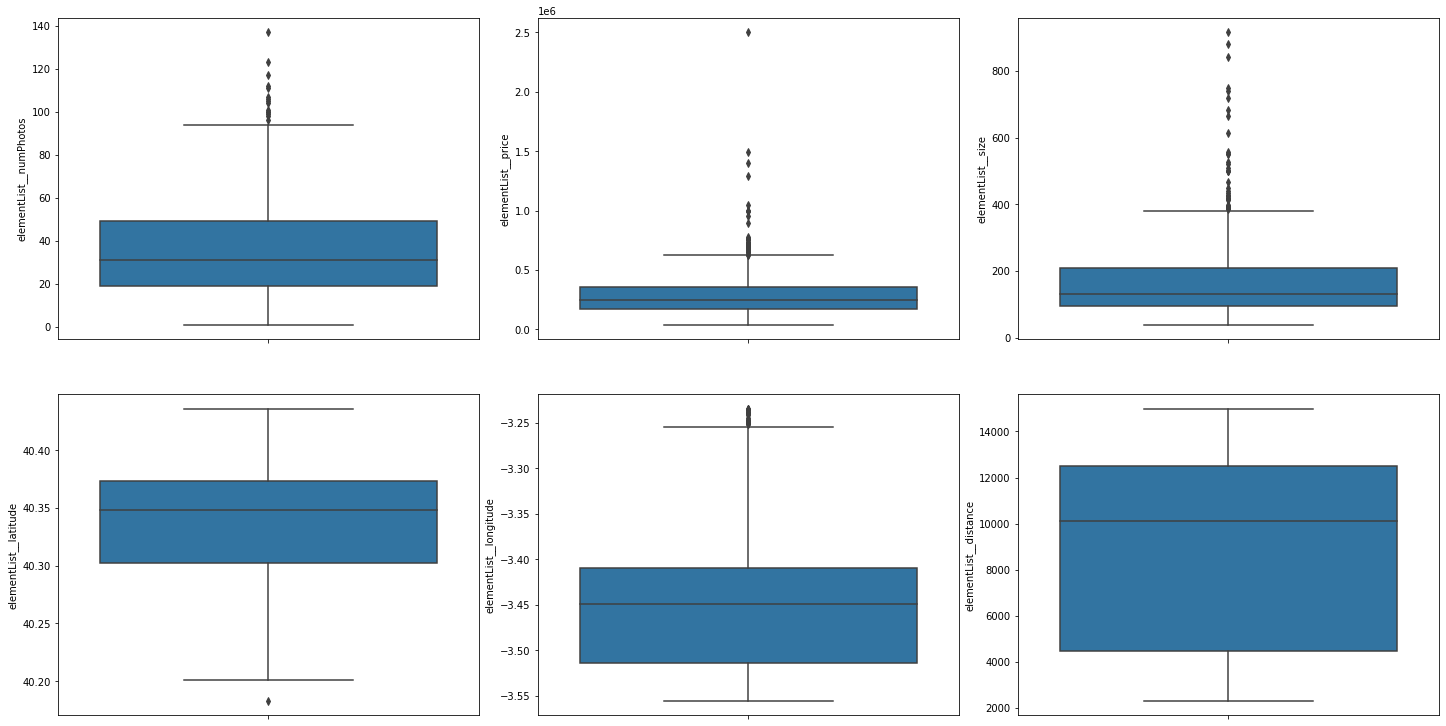

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in numbers.items():   
    print(k)
    print(index)
    print(axs[index])
    sns.boxplot(y=k, data=numbers, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
numbers

,elementList__numPhotos,elementList__price,elementList__size,elementList__latitude,elementList__longitude,elementList__distance
0,17,108000.0,76.0,40.305926,-3.441046,3183
1,46,279000.0,109.0,40.309149,-3.450040,3989
2,33,180000.0,90.0,40.384964,-3.415530,9177
3,98,485000.0,556.0,40.341931,-3.249611,13764
4,70,370000.0,280.0,40.353712,-3.246994,14434
...,...,...,...,...,...,...
695,34,315000.0,281.0,40.210955,-3.353228,11086
696,33,155000.0,86.0,40.394991,-3.484780,12328
697,38,272000.0,350.0,40.367038,-3.260210,14098
698,32,186000.0,115.0,40.227001,-3.434902,8846


In [ ]:
numbers = numbers[~(numbers['elementList__price'] >= 2000000.0)]
print(np.shape(numbers))
#Delete the price outliers

(699, 6)


In [ ]:
numersNoPrice=numbers[['elementList__numPhotos','elementList__size','elementList__latitude','elementList__longitude','elementList__distance']].copy()

In [ ]:
target=numbers[['elementList__price']].copy()

In [ ]:
target

,elementList__price
0,108000.0
1,279000.0
2,180000.0
3,485000.0
4,370000.0
...,...
695,315000.0
696,155000.0
697,272000.0
698,186000.0


In [ ]:
numersNoPrice

,elementList__numPhotos,elementList__size,elementList__latitude,elementList__longitude,elementList__distance
0,17,76.0,40.305926,-3.441046,3183
1,46,109.0,40.309149,-3.450040,3989
2,33,90.0,40.384964,-3.415530,9177
3,98,556.0,40.341931,-3.249611,13764
4,70,280.0,40.353712,-3.246994,14434
...,...,...,...,...,...
695,34,281.0,40.210955,-3.353228,11086
696,33,86.0,40.394991,-3.484780,12328
697,38,350.0,40.367038,-3.260210,14098
698,32,115.0,40.227001,-3.434902,8846


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(numersNoPrice, target, test_size = 0.2, random_state=seed)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)



(559, 5) (559, 1)
(140, 5) (140, 1)


In [ ]:
X_train





,elementList__numPhotos,elementList__size,elementList__latitude,elementList__longitude,elementList__distance
220,23,100.0,40.228290,-3.437739,8785
459,54,255.0,40.364769,-3.541138,13526
129,94,263.0,40.399695,-3.362541,11311
293,36,101.0,40.256717,-3.238647,14914
444,25,135.0,40.297571,-3.444632,3520
...,...,...,...,...,...
318,25,171.0,40.246633,-3.319223,9515
144,13,265.0,40.249103,-3.308649,10041
475,24,136.0,40.329560,-3.507160,9257
319,12,53.0,40.299518,-3.438401,2965


In [ ]:
X_test

,elementList__numPhotos,elementList__size,elementList__latitude,elementList__longitude,elementList__distance
438,45,217.0,40.347325,-3.523912,11322
512,23,121.0,40.305720,-3.446964,3680
216,9,81.0,40.376775,-3.480573,10481
685,46,135.0,40.361415,-3.548987,13925
303,4,96.0,40.395146,-3.486903,12444
...,...,...,...,...,...
461,30,111.0,40.292127,-3.446720,3839
517,32,113.0,40.293191,-3.430168,2490
606,69,159.0,40.327650,-3.508397,9291
164,54,308.0,40.355221,-3.272087,12581


In [ ]:
y_train

,elementList__price
220,235000.0
459,599000.0
129,325000.0
293,70000.0
444,264000.0
...,...
318,75000.0
144,650000.0
475,298000.0
319,149000.0


In [ ]:
y_test

,elementList__price
438,499000.0
512,220000.0
216,191500.0
685,229900.0
303,157000.0
...,...
461,219800.0
517,196764.0
606,425000.0
164,324900.0


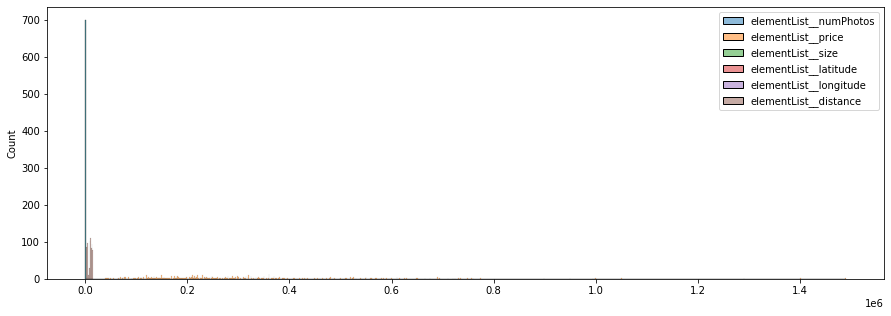

In [ ]:
# Inspect the target
#mpl.rcParams.update(mpl.rcParamsDefault)
#sns.set(font_scale=1.1, style=None, palette='Set2')
plt.figure(figsize=(15,5))
sns.histplot(numbers)
plt.show()
#This will show a histogram of all the classes, difficult to observe, we should do separate histograms for each class

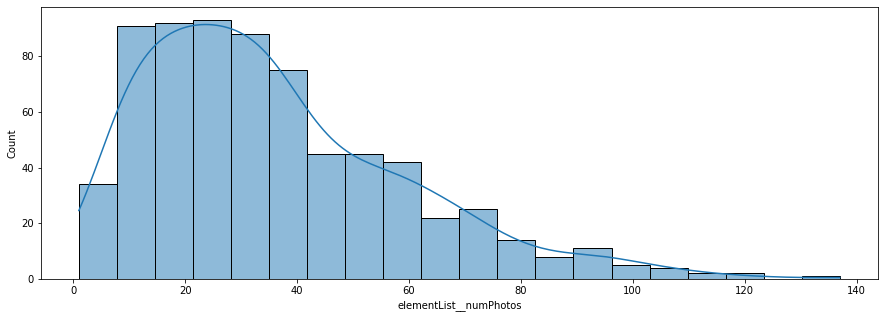

In [ ]:
# Inspect the target
plt.figure(figsize=(15,5))
sns.histplot(numbers,x='elementList__numPhotos',kde=True)
plt.show()

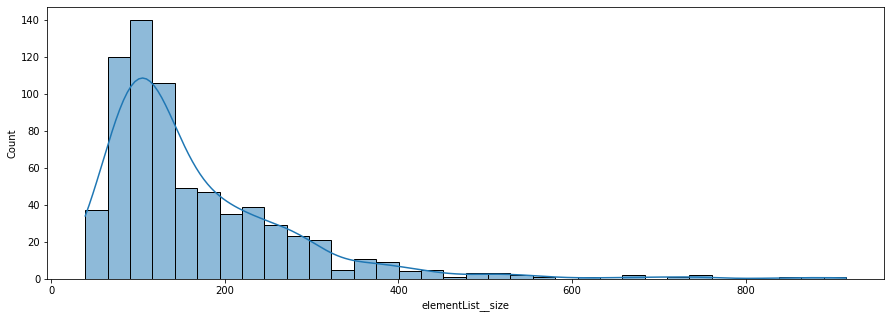

In [ ]:
# Inspect the target
plt.figure(figsize=(15,5))
sns.histplot(numbers,x='elementList__size',kde=True)
plt.show()


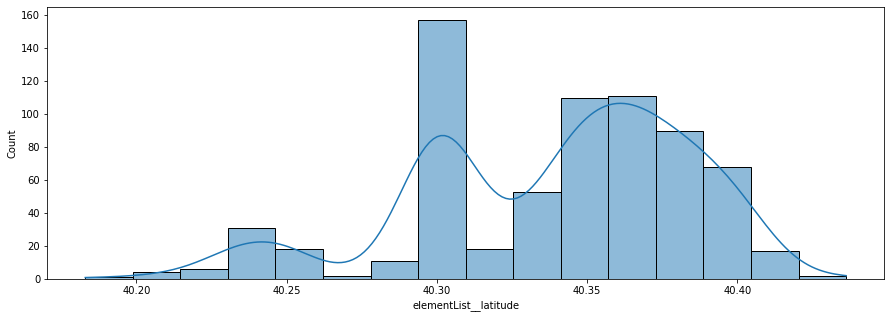

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(numbers,x='elementList__latitude',kde=True)
plt.show()

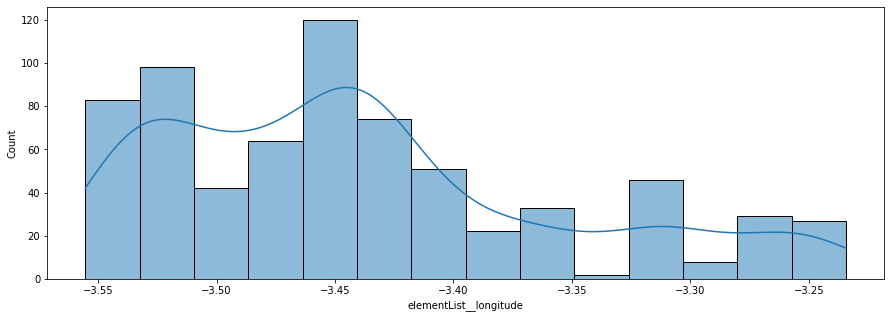

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(numbers,x='elementList__longitude',kde=True)
plt.show()

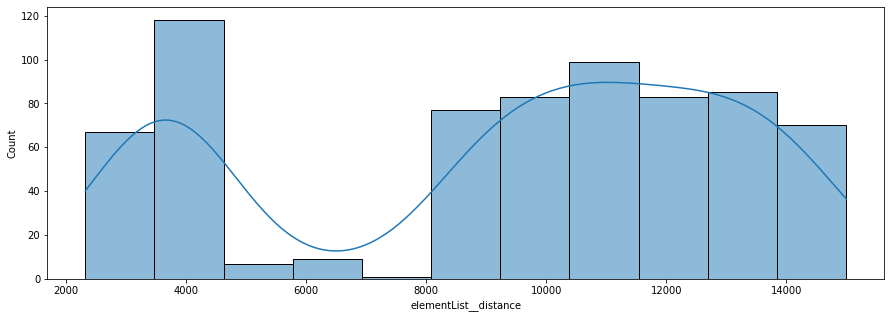

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(numbers,x='elementList__distance',kde=True)
plt.show()

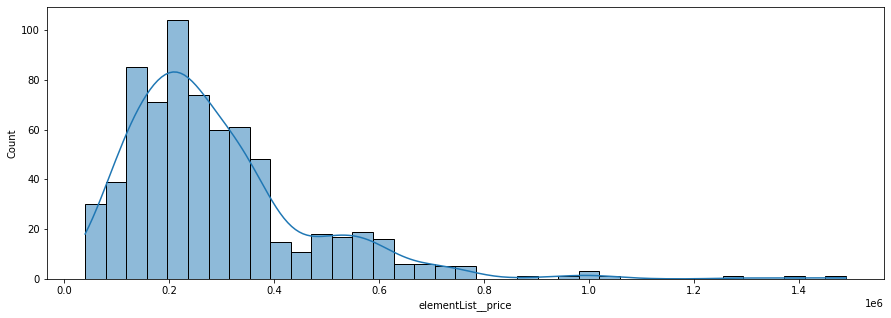

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(target,x='elementList__price',kde=True)
plt.show()

In [ ]:
# Normalize both features and target
max_df = X_train.max()
min_df = X_train.min()
max_t = y_train.max()
min_t = y_train.min()

X_train = (X_train - min_df)/(max_df - min_df)
y_train = (y_train - min_t)/(max_t - min_t)

print('Madrid dataset shape',X_train.shape)
print('Target shape', y_train.shape)
X_train.describe()


Madrid dataset shape (559, 5)
Target shape (559, 1)


,elementList__numPhotos,elementList__size,elementList__latitude,elementList__longitude,elementList__distance
count,559.000000,559.000000,559.000000,559.000000,559.000000
mean,0.254985,0.145442,0.613061,0.366616,0.548205
std,0.171832,0.133165,0.183349,0.261720,0.306770
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.132353,0.060433,0.470442,0.133361,0.164852
50%,0.220588,0.101482,0.651777,0.332397,0.615542
75%,0.352941,0.190992,0.751752,0.478865,0.802801
max,1.000000,1.000000,1.000000,1.000000,1.000000


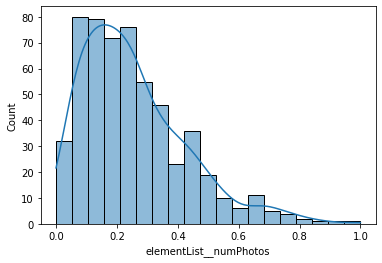

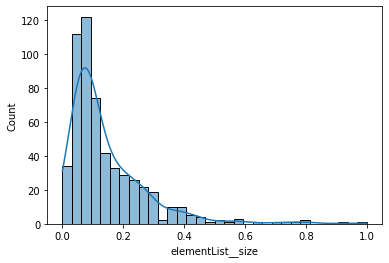

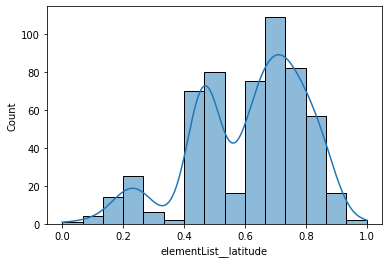

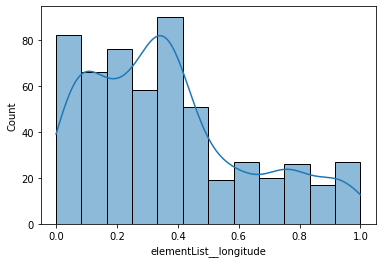

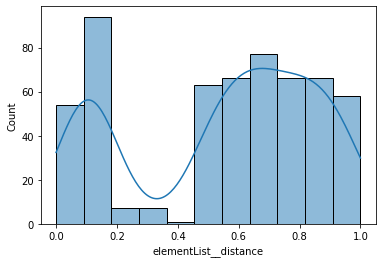

In [ ]:
for column in X_train:
    #print([column])
    sns.histplot(X_train,x=column,kde=True)
    plt.show()
    


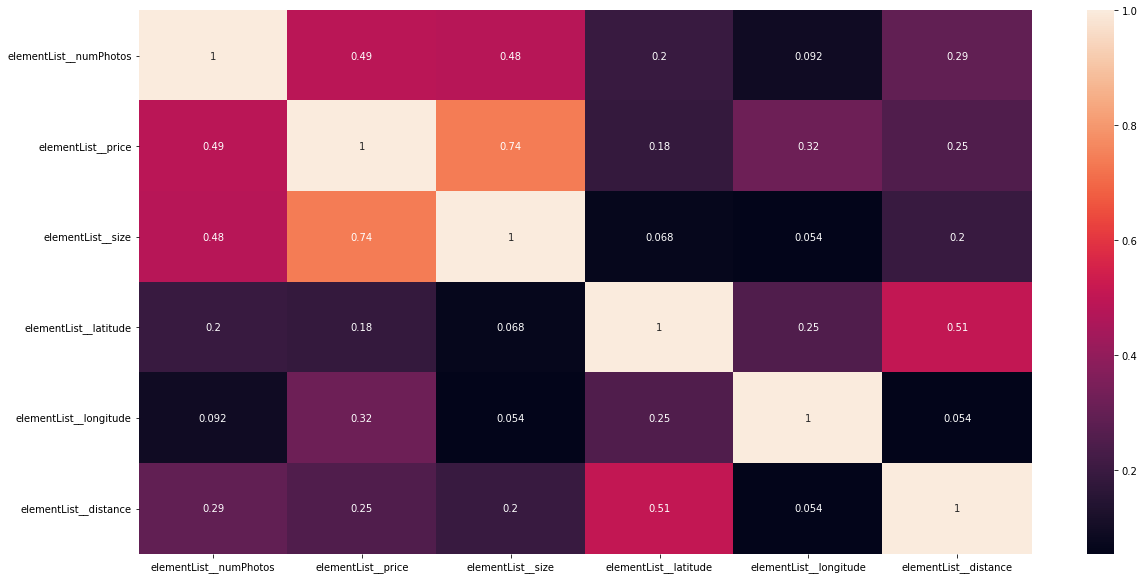

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(numbers.corr().abs(),  annot=True)
#Matrixcorrelation f every data with every data, thats WHY DO WE USE MEDV AS TARGET, THE NEXT GRAPH THE SAME

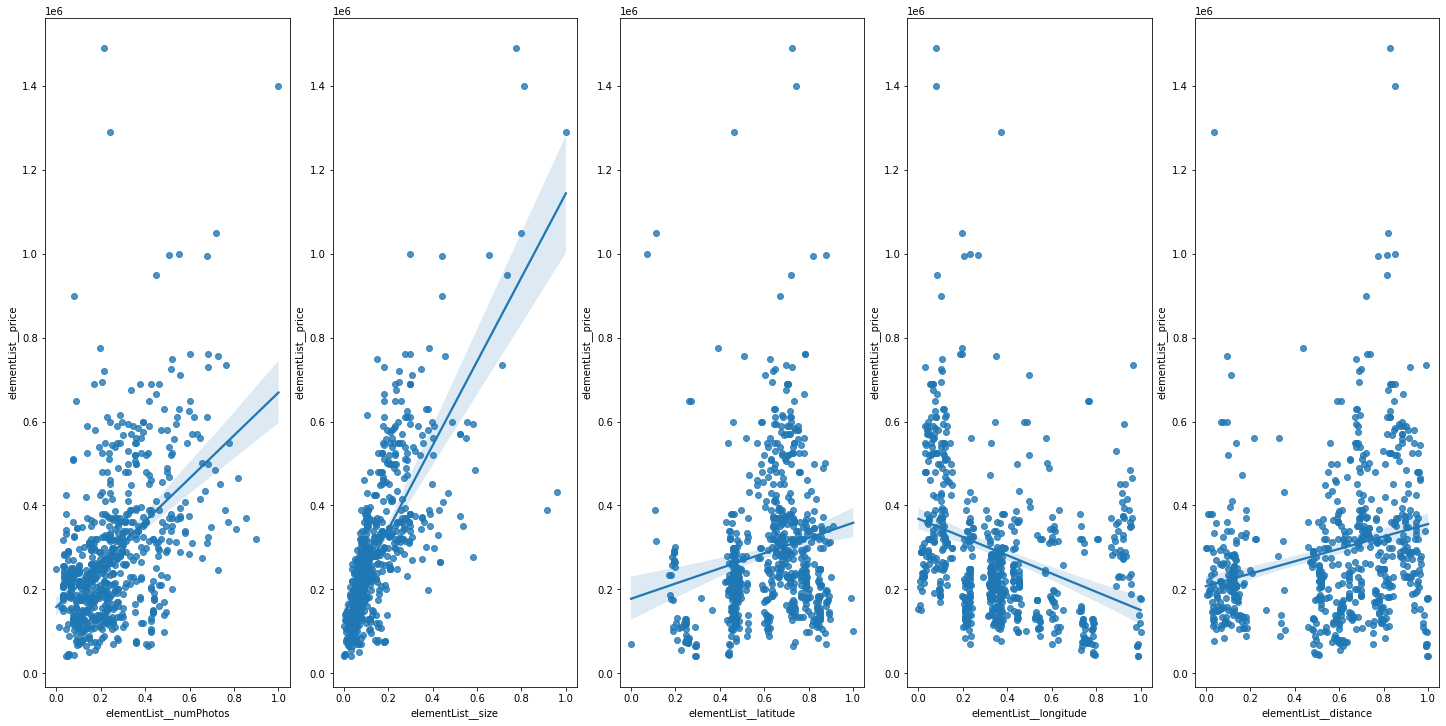

In [ ]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['elementList__numPhotos','elementList__size','elementList__latitude','elementList__longitude','elementList__distance']
x = numbers.loc[:,column_sels]
y = numbers['elementList__price']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
price=numbers['elementList__price']
price.shape
price

0      108000.0
1      279000.0
2      180000.0
3      485000.0
4      370000.0
         ...   
695    315000.0
696    155000.0
697    272000.0
698    186000.0
699    386000.0
Name: elementList__price, Length: 699, dtype: float64

In [ ]:
size=numbers['elementList__size']
size

0       76.0
1      109.0
2       90.0
3      556.0
4      280.0
       ...  
695    281.0
696     86.0
697    350.0
698    115.0
699    206.0
Name: elementList__size, Length: 699, dtype: float64

In [ ]:
priceA=price.to_numpy()
priceA

array([ 108000.,  279000.,  180000.,  485000.,  370000.,  140000.,
        395000.,  735000.,  300000.,  350000.,  360000.,  249900.,
        350000.,  219900.,   41500.,  216000.,  339000.,  155000.,
       1000000.,  995000.,  265000.,  210000.,  230000.,  125000.,
         77000.,  277000.,   98000.,  127000.,  155000.,  134900.,
        395000.,  230000.,  210000.,  180000.,  356100.,  674999.,
        189000.,  260000.,  410000.,  170000.,  134000.,  111000.,
        191000.,  313000.,  420000.,   73000.,   74000.,   77000.,
         79000.,  489000.,   69990.,  364900.,  117000.,  690000.,
        319900.,  504900.,  130300.,  249000.,  212000.,  270000.,
        300000.,  319900.,  156000.,  380000.,  199000.,  338000.,
        169000.,  340000.,  173800.,  229900.,  519999.,  360000.,
         84000.,  335000.,  315000.,  211000.,  220000.,  396000.,
        275000.,  380000.,  254000.,  177000.,  130000.,  132000.,
        389000.,  120000.,  249000.,  159000.,  480000.,  1549

In [ ]:
sizeA=size.to_numpy()
sizeA

array([ 76., 109.,  90., 556., 280.,  60., 281., 665., 200., 240., 355.,
        91., 378.,  91.,  70.,  97., 190.,  98., 300., 426.,  89.,  88.,
       140.,  71.,  57., 550.,  66.,  50.,  76.,  75., 128., 130., 145.,
       110., 167., 245., 100., 220., 230.,  90.,  81.,  77., 128., 261.,
       217.,  66., 200., 202., 176., 286.,  92., 273.,  83., 300., 266.,
       216.,  80., 222., 113., 113., 365., 265.,  84., 380., 370., 192.,
       101., 153.,  85., 135., 390., 271.,  79., 105., 160.,  82.,  88.,
       144., 234., 300., 221., 107., 135., 113., 375., 167., 150.,  80.,
       249., 108., 171., 130., 120.,  92., 126., 417., 500., 128.,  70.,
       104., 102., 119.,  99., 101., 107., 106., 131., 148., 167., 189.,
       740.,  44., 110.,  98., 150., 261., 160., 116., 132., 254., 145.,
       115., 191.,  60., 130.,  54.,  68., 102., 263., 174.,  83., 394.,
       106., 104., 132., 241.,  69., 121., 239., 133.,  88., 133., 297.,
       265., 176.,  60., 150., 217., 244., 105.,  7

In [ ]:
print(priceA.shape)
priceA=priceA.reshape(-1, 1)
print(priceA.shape)

(699,)
(699, 1)


In [ ]:
print(sizeA.shape)
sizeA=sizeA.reshape(-1, 1)
print(sizeA.shape)

(699,)
(699, 1)


In [ ]:
#Fitting a regression model
from sklearn.linear_model import *

reg = LinearRegression()
reg.fit(sizeA,priceA)
predictions_space = np.linspace(min(sizeA),max(sizeA))
reg.score(sizeA,priceA)


0.5458841459457655

Text(0.5, 0, 'Size')

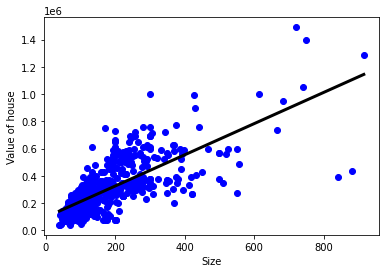

In [ ]:

y1_pred = reg.predict(predictions_space) 
plt.scatter(sizeA,y,color = 'blue')
plt.plot(predictions_space,y1_pred, color = 'black', linewidth = 3)
plt.ylabel('Value of house')
plt.xlabel('Size')



In [ ]:
#Fitting a regression model
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(sizeA,priceA)
predictions_space = np.linspace(min(sizeA),max(sizeA))
lasso.score(sizeA,priceA)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


0.5458841457276618

Text(0.5, 0, 'Size')

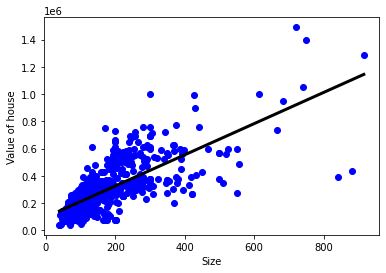

In [ ]:

y1_pred = lasso.predict(predictions_space) 
plt.scatter(sizeA,y,color = 'blue')
plt.plot(predictions_space,y1_pred, color = 'black', linewidth = 3)
plt.ylabel('Value of house')
plt.xlabel('Size')

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(sizeA,priceA)
ridge_pred = ridge.predict(sizeA)
ridge.score(sizeA,priceA)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


0.5413727067230731

Text(0.5, 0, 'Size')

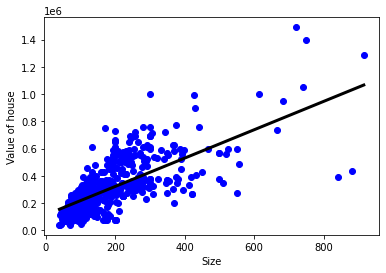

In [ ]:
y1_pred = ridge.predict(predictions_space) 
plt.scatter(sizeA,y,color = 'blue')
plt.plot(predictions_space,y1_pred, color = 'black', linewidth = 3)
plt.ylabel('Value of house')
plt.xlabel('Size')

In [ ]:
# Linear Regression on all features of boston housing data set
reg_all = LinearRegression()
reg_all.fit(X_train,y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test,y_test)

-3.581430731202593

In [ ]:
#calculating R squared
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


-3.581430731202593

In [ ]:
#calculating root mean square
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("root mean squared :{}".format(rmse))


root mean squared :341461.83216677385


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(X_train,y_train)
ridge_pred = ridge.predict(X_test)
ridge.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


-3.5814146326365686

In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


-3.5892335104889623

IN THE NEXT CODE WE ARE GOING TO CHECK THAT INDEED, SOME VARAIBLES ARE TOTALLY INDEPENDIENT TO THE PRIZE


In [ ]:
todo

MODEL LINEAR REGRESSION WITHOUT ANTI OVERFITTING TECHNIQUES 

In [ ]:
input_shape = X_train.shape[1:]
loss = tfk.losses.MeanSquaredError()
learning_rate = 0.2
optimizer = tfk.optimizers.SGD(learning_rate)

In [ ]:
def build_default_model(input_shape):

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    hidden_layer1 = tfkl.Dense(units=256, activation='relu', name='Hidden1', kernel_initializer=tfk.initializers.GlorotUniform(seed=seed))(input_layer)
    hidden_layer2 = tfkl.Dense(units=128, activation='relu', name='Hidden2', kernel_initializer=tfk.initializers.GlorotUniform(seed=seed))(hidden_layer1)
    hidden_layer3 = tfkl.Dense(units=64, activation='relu', name='Hidden3', kernel_initializer=tfk.initializers.GlorotUniform(seed=seed))(hidden_layer2)
    output_layer = tfkl.Dense(units=1, activation='linear', name='Output', kernel_initializer=tfk.initializers.GlorotUniform(seed=seed))(hidden_layer3)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='default_model')

    # Compile the model
    learning_rate = 1e-3
    opt = tfk.optimizers.Adam(learning_rate)
    loss = tfk.losses.MeanSquaredError()
    mtr = ['mse']
    model.compile(loss=loss, optimizer=opt, metrics=mtr)

    # Return the model
    return model

In [ ]:
input_shape = X_train.shape[1:]
batch_size = 256
epochs = 1000

In [ ]:
def monitor(histories, names, colors, early_stopping=1):
    assert len(histories) == len(names)
    assert len(histories) == len(colors)
    plt.figure(figsize=(15,6))
    for idx in range(len(histories)):
        plt.plot(histories[idx]['mse'][:-early_stopping], label=names[idx]+' Training', alpha=.4, color=colors[idx], linestyle='--')
        plt.plot(histories[idx]['val_mse'][:-early_stopping], label=names[idx]+' Validation', alpha=.8, color=colors[idx])   
    plt.ylim(0.0075, 0.02)
    plt.title('Mean Squared Error')
    plt.legend(bbox_to_anchor=(1,1))
    plt.grid(alpha=.3)
    plt.show()

In [ ]:
def plot_residuals(model, X_, y_):
    X_['sort'] = y_
    X_ = X_.sort_values(by=['sort'])
    y_ = np.expand_dims(X_['sort'], 1)
    X_.drop(['sort'], axis=1, inplace=True)

    y_pred = model.predict(X_)
    MSE = mean_squared_error(y_,y_pred)

    print('Mean Squared Error (MSE): %.4f' % MSE)

    mpl.rcParams.update(mpl.rcParamsDefault)
    sns.set(font_scale=1.1, style=None, palette='Set1')
    plt.figure(figsize=(15,5))
    plt.scatter(np.arange(len(y_pred)), y_pred, label='Prediction', color='#1f77b4')
    plt.scatter(np.arange(len(y_)), y_, label='True', color='#d62728')
    
    for i in range(len(y_)):
        if(y_[i]>=y_pred[i]):
            plt.vlines(i,y_pred[i],y_[i],alpha=.5)
        else:
            plt.vlines(i,y_[i],y_pred[i],alpha=.5)
            
    plt.legend()
    plt.grid(alpha=.3)
    plt.show()

Model: "default_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 5)]               0         
                                                                 
 Hidden1 (Dense)             (None, 256)               1536      
                                                                 
 Hidden2 (Dense)             (None, 128)               32896     
                                                                 
 Hidden3 (Dense)             (None, 64)                8256      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 42,753
Trainable params: 42,753
Non-trainable params: 0
_________________________________________________________________


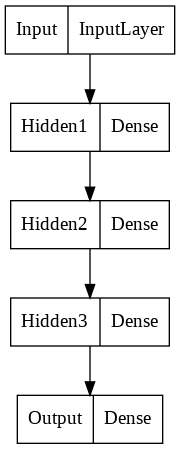

In [ ]:
default_model = build_default_model(input_shape)
default_model.summary()
tfk.utils.plot_model(default_model)

In [ ]:
batch_size = 256
epochs = 2000

In [ ]:
X_train

,elementList__numPhotos,elementList__size,elementList__latitude,elementList__longitude,elementList__distance
220,0.161765,0.069555,0.178764,0.366399,0.509980
459,0.389706,0.246294,0.717702,0.044460,0.884024
129,0.683824,0.255416,0.855619,0.600531,0.709270
293,0.257353,0.070696,0.291016,0.986284,0.993531
444,0.176471,0.109464,0.452346,0.344937,0.094596
...,...,...,...,...,...
318,0.176471,0.150513,0.251198,0.735403,0.567574
144,0.088235,0.257697,0.260952,0.768328,0.609073
475,0.169118,0.110604,0.578668,0.150253,0.547219
319,0.080882,0.015964,0.460035,0.364339,0.050809


In [ ]:
y_train

,elementList__price
220,0.133586
459,0.384881
129,0.195720
293,0.019676
444,0.153607
...,...
318,0.023127
144,0.420090
475,0.177080
319,0.074215


In [ ]:
history = default_model.fit(
    x = X_train,
    y = y_train, 
    batch_size = batch_size,
    epochs = epochs
).history

Epoch 1/2000
3/3 [==============================] - 1s 14ms/step - loss: 0.0241 - mse: 0.0241
Epoch 2/2000
3/3 [==============================] - 0s 11ms/step - loss: 0.0136 - mse: 0.0136
Epoch 3/2000
3/3 [==============================] - 0s 9ms/step - loss: 0.0102 - mse: 0.0102
Epoch 4/2000
3/3 [==============================] - 0s 9ms/step - loss: 0.0073 - mse: 0.0073
Epoch 5/2000
3/3 [==============================] - 0s 8ms/step - loss: 0.0060 - mse: 0.0060
Epoch 6/2000
3/3 [==============================] - 0s 9ms/step - loss: 0.0052 - mse: 0.0052
Epoch 7/2000
3/3 [==============================] - 0s 8ms/step - loss: 0.0047 - mse: 0.0047
Epoch 8/2000
3/3 [==============================] - 0s 8ms/step - loss: 0.0044 - mse: 0.0044
Epoch 9/2000
3/3 [==============================] - 0s 8ms/step - loss: 0.0042 - mse: 0.0042
Epoch 10/2000
3/3 [==============================] - 0s 9ms/step - loss: 0.0040 - mse: 0.0040
Epoch 11/2000
3/3 [==============================] - 0s 8ms/step - 

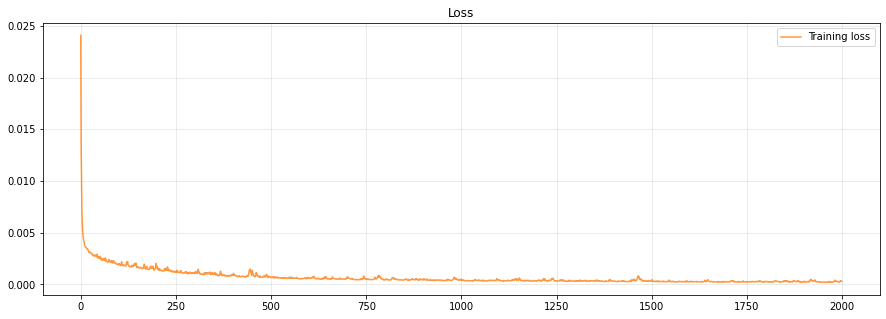

In [ ]:
#mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(figsize=(15,5))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
def plot_residuals(model, X_, y_):
    X_['sort'] = y_
    X_ = X_.sort_values(by=['sort'])
    y_ = np.expand_dims(X_['sort'], 1)
    X_.drop(['sort'], axis=1, inplace=True)

    y_pred = model.predict(X_)
    SSE = np.square(y_pred - y_)
    MSE = np.mean(SSE)

    print('Mean Squared Error (MSE):', MSE)

    mpl.rcParams.update(mpl.rcParamsDefault)
    sns.set(font_scale=1.1, style=None, palette='Set1')
    plt.figure(figsize=(15,5))
    plt.scatter(np.arange(len(y_)), y_, label='True')
    plt.scatter(np.arange(len(y_pred)), y_pred, label='Prediction')
    
    for i in range(len(y_)):
        if(y_[i]>=y_pred[i]):
            plt.vlines(i,y_pred[i],y_[i],alpha=.5)
        else:
            plt.vlines(i,y_[i],y_pred[i],alpha=.5)
            
    plt.legend()
    plt.grid(alpha=.3)
    plt.show()

18/18 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 0.0002574027972540425


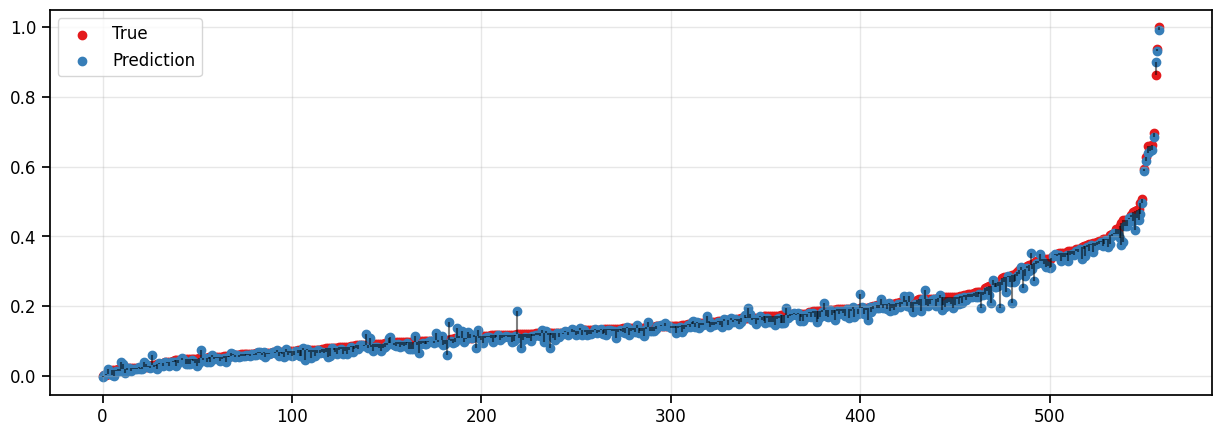

In [ ]:
plot_residuals(default_model, X_train.copy(), y_train.copy())

Now With Early Stop

In [ ]:
histories = []
names = []
colors = []
val_scores = []
test_scores = []

In [ ]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=seed)
print(X_train2.shape, y_train2.shape)
print(X_val.shape, y_val.shape)

(447, 5) (447, 1)
(112, 5) (112, 1)


Model: "default_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 5)]               0         
                                                                 
 Hidden1 (Dense)             (None, 256)               1536      
                                                                 
 Hidden2 (Dense)             (None, 128)               32896     
                                                                 
 Hidden3 (Dense)             (None, 64)                8256      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 42,753
Trainable params: 42,753
Non-trainable params: 0
_________________________________________________________________


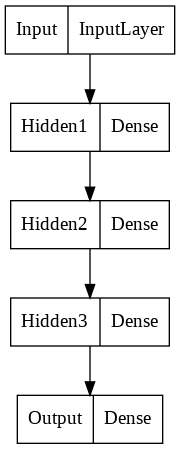

In [ ]:
default_model2 = build_default_model(input_shape)
default_model2.summary()
tfk.utils.plot_model(default_model2)

In [ ]:
default_history2 = default_model2.fit(
    x = X_train,
    y = y_train, 
    validation_data=(X_val, y_val),
    batch_size = batch_size,
    epochs = epochs
).history

Epoch 1/2000
3/3 [==============================] - 1s 252ms/step - loss: 0.0193 - mse: 0.0193 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 2/2000
3/3 [==============================] - 0s 33ms/step - loss: 0.0121 - mse: 0.0121 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 3/2000
3/3 [==============================] - 0s 45ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 4/2000
3/3 [==============================] - 0s 30ms/step - loss: 0.0067 - mse: 0.0067 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 5/2000
3/3 [==============================] - 0s 30ms/step - loss: 0.0054 - mse: 0.0054 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 6/2000
3/3 [==============================] - 0s 21ms/step - loss: 0.0048 - mse: 0.0048 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 7/2000
3/3 [==============================] - 0s 21ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 8/2000
3/3 [==============================] - 0s 25ms/step - loss: 0.0042 - 

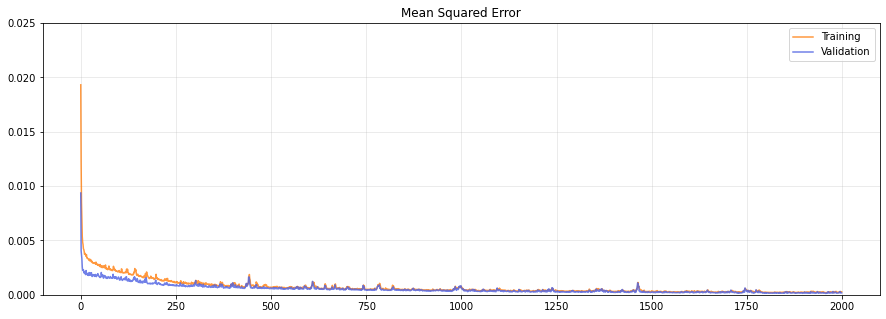

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(default_history2['mse'], label='Training', alpha=.8, color='#ff7f0e')
plt.plot(default_history2['val_mse'], label='Validation', alpha=.8, color='#4D61E2')
plt.ylim(0, 0.025)
plt.title('Mean Squared Error')
plt.legend(loc='upper right')
plt.grid(alpha=.3)
plt.show()

Train Performance
18/18 [==============================] - 0s 5ms/step
Mean Squared Error (MSE): 0.0002


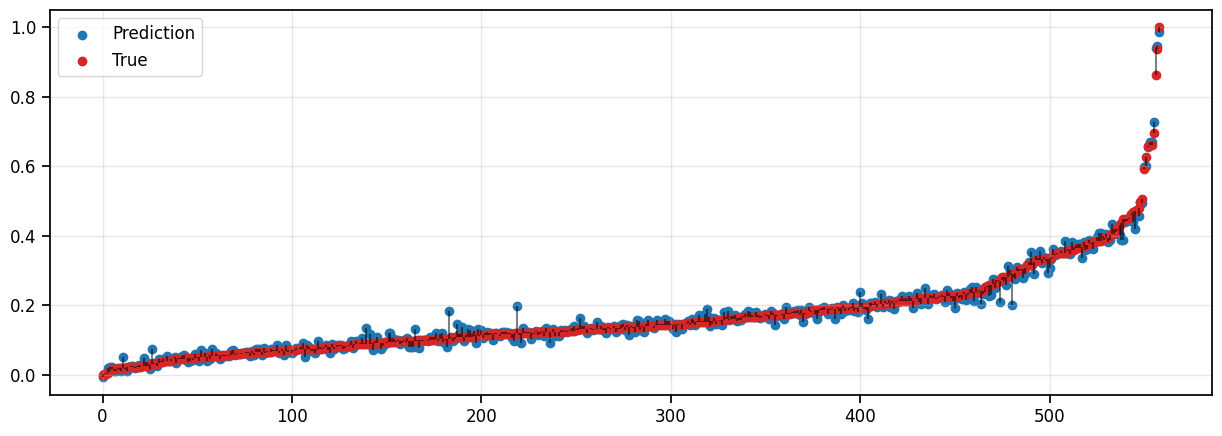

Validation Performance
4/4 [==============================] - 0s 5ms/step
Mean Squared Error (MSE): 0.0002


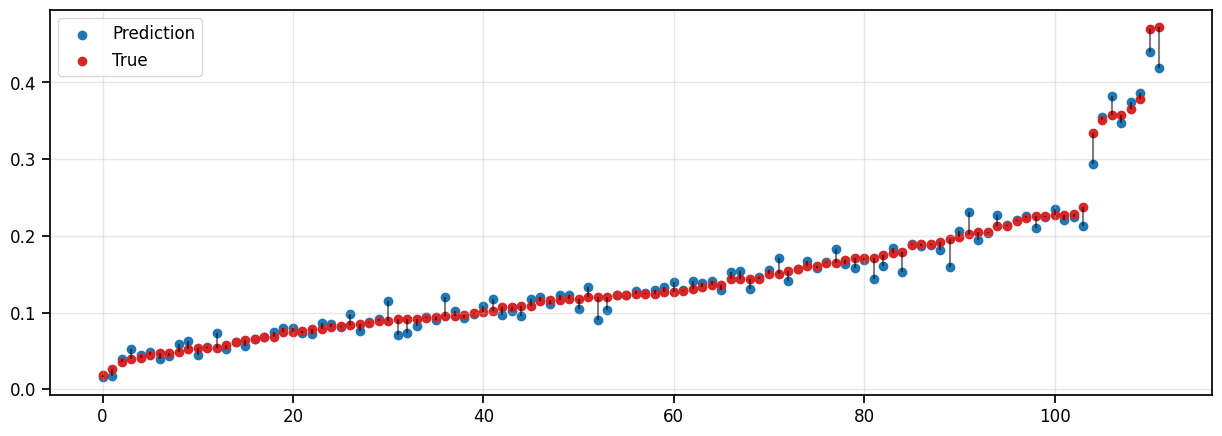

In [ ]:
print('Train Performance')
plot_residuals(default_model2, X_train.copy(), y_train.copy())
print('Validation Performance')
plot_residuals(default_model2, X_val.copy(), y_val.copy())

In [ ]:
patience = 15
early_stopping = tfk.callbacks.EarlyStopping(monitor='val_mse', mode='min', patience=patience, restore_best_weights=True)

Model: "default_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 5)]               0         
                                                                 
 Hidden1 (Dense)             (None, 256)               1536      
                                                                 
 Hidden2 (Dense)             (None, 128)               32896     
                                                                 
 Hidden3 (Dense)             (None, 64)                8256      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 42,753
Trainable params: 42,753
Non-trainable params: 0
_________________________________________________________________


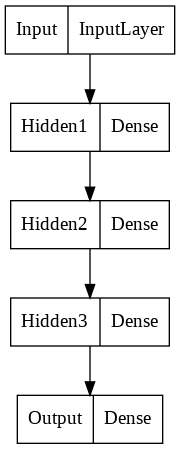

In [ ]:
earlystopping_model = build_default_model(input_shape)
earlystopping_model.summary()
tfk.utils.plot_model(earlystopping_model)

In [ ]:
earlystopping_history = earlystopping_model.fit(
    x = X_train,
    y = y_train, 
    validation_data=(X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks=[early_stopping]
).history

Epoch 1/2000
3/3 [==============================] - 1s 108ms/step - loss: 0.0366 - mse: 0.0366 - val_loss: 0.0081 - val_mse: 0.0081
Epoch 2/2000
3/3 [==============================] - 0s 18ms/step - loss: 0.0146 - mse: 0.0146 - val_loss: 0.0109 - val_mse: 0.0109
Epoch 3/2000
3/3 [==============================] - 0s 29ms/step - loss: 0.0125 - mse: 0.0125 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 4/2000
3/3 [==============================] - 0s 42ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 5/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 6/2000
3/3 [==============================] - 0s 30ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 7/2000
3/3 [==============================] - 0s 47ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 8/2000
3/3 [==============================] - 0s 50ms/step - loss: 0.0051 - 

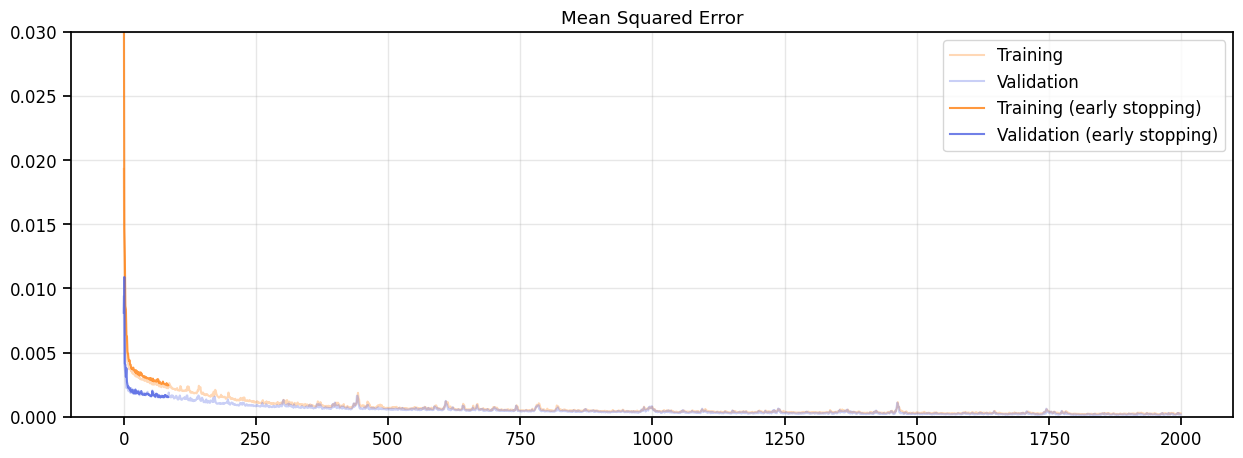

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(default_history2['mse'], label='Training', alpha=.3, color='#ff7f0e')
plt.plot(default_history2['val_mse'], label='Validation', alpha=.3, color='#4D61E2')
plt.plot(earlystopping_history['mse'], label='Training (early stopping)', alpha=.8, color='#ff7f0e')
plt.plot(earlystopping_history['val_mse'], label='Validation (early stopping)', alpha=.8, color='#4D61E2')
plt.ylim(0, 0.03)
plt.title('Mean Squared Error')
plt.legend(loc='upper right')
plt.grid(alpha=.3)
plt.show()

Train Performance
18/18 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.0026


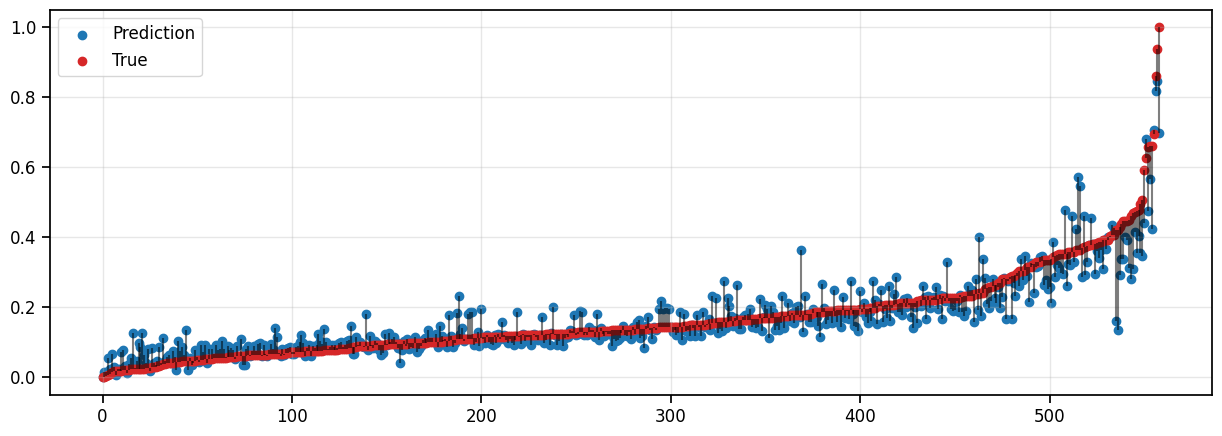

Validation Performance
4/4 [==============================] - 0s 5ms/step
Mean Squared Error (MSE): 0.0015


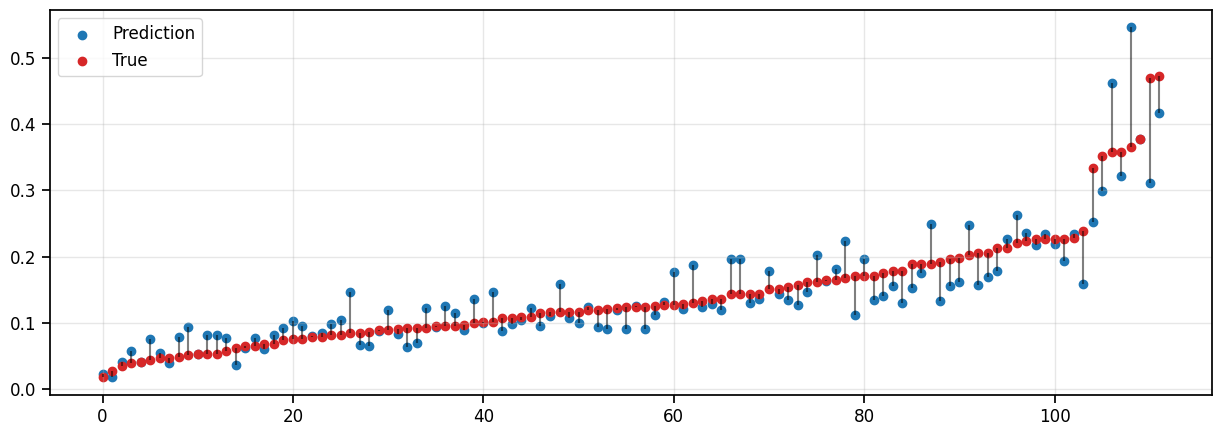

In [ ]:
print('Train Performance')
plot_residuals(earlystopping_model, X_train.copy(), y_train.copy())
print('Validation Performance')
plot_residuals(earlystopping_model, X_val.copy(), y_val.copy())

4/4 [==============================] - 0s 3ms/step
Validation MSE 0.0015
5/5 [==============================] - 0s 2ms/step


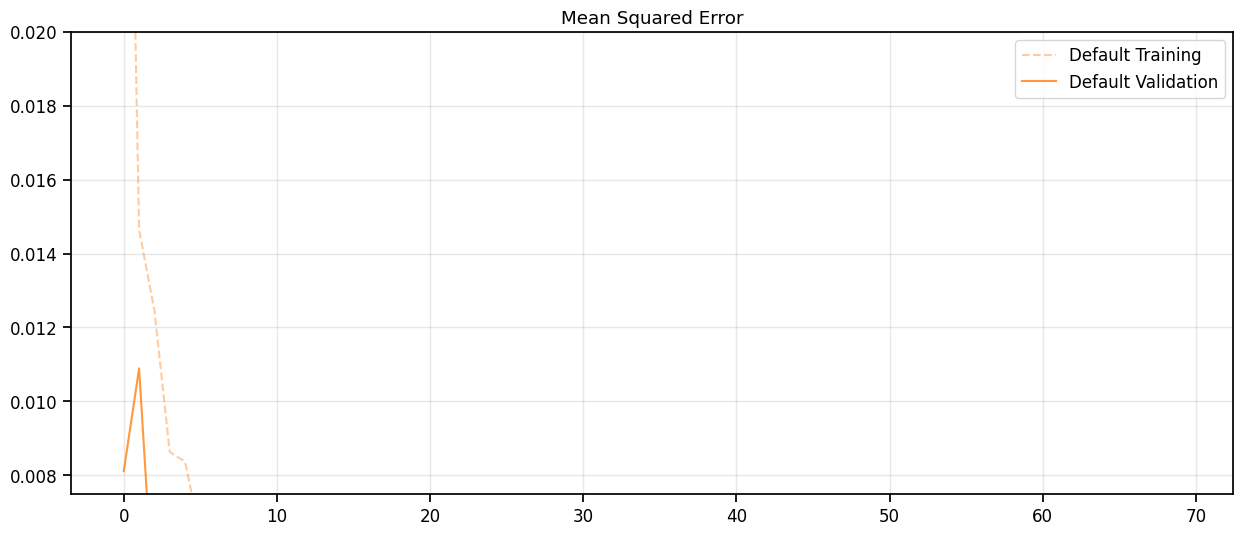

In [ ]:
# Store results
val_scores.append(mean_squared_error(y_val, earlystopping_model.predict(X_val)))
print('Validation MSE %.4f' % val_scores[0])
test_scores.append(mean_squared_error(y_test, earlystopping_model.predict(X_test)))
histories.append(earlystopping_history)
names.append('Default')
colors.append('#ff7f0e')
monitor(histories, names, colors, patience)

Regularization ## Regularization techniques


Weight decay (or l2-norm or Ridge regression)[texto del enlace](https://)

In [ ]:
def build_l2_model(input_shape):

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    hidden_layer1 = tfkl.Dense(units=256, activation='relu', name='Hidden1', 
                               kernel_initializer=tfk.initializers.GlorotUniform(seed=seed), 
                               kernel_regularizer=tf.keras.regularizers.l2(1e-5))(input_layer)
    hidden_layer2 = tfkl.Dense(units=128, activation='relu', name='Hidden2', 
                               kernel_initializer=tfk.initializers.GlorotUniform(seed=seed),
                               kernel_regularizer=tf.keras.regularizers.l2(1e-5))(hidden_layer1)
    hidden_layer3 = tfkl.Dense(units=64, activation='relu', name='Hidden3', 
                               kernel_initializer=tfk.initializers.GlorotUniform(seed=seed),
                               kernel_regularizer=tf.keras.regularizers.l2(1e-5))(hidden_layer2)
    output_layer = tfkl.Dense(units=1, activation='linear', name='Output', 
                              kernel_initializer=tfk.initializers.GlorotUniform(seed=seed),
                              kernel_regularizer=tf.keras.regularizers.l2(1e-5))(hidden_layer3)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='l2_model')

    # Compile the model
    learning_rate = 1e-3
    opt = tfk.optimizers.Adam(learning_rate)
    loss = tfk.losses.MeanSquaredError()
    mtr = ['mse']
    model.compile(loss=loss, optimizer=opt, metrics=mtr)

    # Return the model
    return model

Model: "l2_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 5)]               0         
                                                                 
 Hidden1 (Dense)             (None, 256)               1536      
                                                                 
 Hidden2 (Dense)             (None, 128)               32896     
                                                                 
 Hidden3 (Dense)             (None, 64)                8256      
                                                                 
 Output (Dense)              (None, 1)                 65        
                                                                 
Total params: 42,753
Trainable params: 42,753
Non-trainable params: 0
_________________________________________________________________


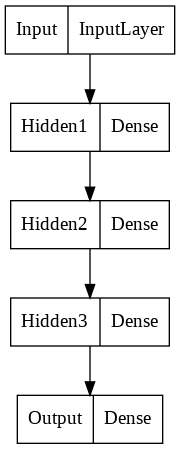

In [ ]:
l2_model = build_l2_model(input_shape)
l2_model.summary()
tfk.utils.plot_model(l2_model)

In [ ]:
history_l2 = l2_model.fit(
    x = X_train,
    y = y_train, 
    validation_data=(X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks=[early_stopping]
).history

Epoch 1/2000
3/3 [==============================] - 0s 49ms/step - loss: 0.0041 - mse: 0.0027 - val_loss: 0.0031 - val_mse: 0.0018
Epoch 2/2000
3/3 [==============================] - 0s 24ms/step - loss: 0.0040 - mse: 0.0026 - val_loss: 0.0031 - val_mse: 0.0017
Epoch 3/2000
3/3 [==============================] - 0s 22ms/step - loss: 0.0038 - mse: 0.0024 - val_loss: 0.0038 - val_mse: 0.0024
Epoch 4/2000
3/3 [==============================] - 0s 21ms/step - loss: 0.0042 - mse: 0.0028 - val_loss: 0.0035 - val_mse: 0.0022
Epoch 5/2000
3/3 [==============================] - 0s 25ms/step - loss: 0.0044 - mse: 0.0030 - val_loss: 0.0031 - val_mse: 0.0017
Epoch 6/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0040 - mse: 0.0027 - val_loss: 0.0030 - val_mse: 0.0016
Epoch 7/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0037 - mse: 0.0023 - val_loss: 0.0029 - val_mse: 0.0016
Epoch 8/2000
3/3 [==============================] - 0s 24ms/step - loss: 0.0037 - m

4/4 [==============================] - 0s 4ms/step
Validation MSE 0.0015
5/5 [==============================] - 0s 4ms/step


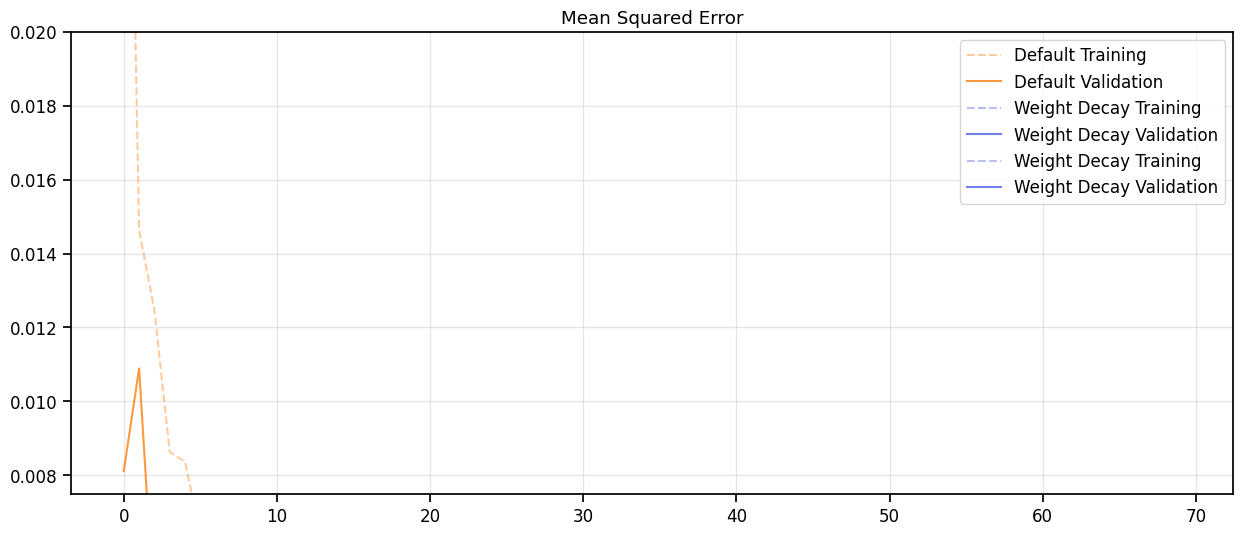

In [ ]:
# Store results
val_scores.append(mean_squared_error(y_val, l2_model.predict(X_val)))
print('Validation MSE %.4f' % val_scores[1])
test_scores.append(mean_squared_error(y_test, l2_model.predict(X_test)))
histories.append(history_l2)
names.append('Weight Decay')
colors.append('#4D61E2')
monitor(histories, names, colors, patience)

### Dropout


In [ ]:
def build_dropout_model(input_shape):

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    hidden_layer1 = tfkl.Dense(units=256, activation='relu', name='Hidden1', 
                               kernel_initializer=tfk.initializers.GlorotUniform(seed=seed))(input_layer)
    hidden_layer1 = tfkl.Dropout(0.4, seed=seed)(hidden_layer1)
    hidden_layer2 = tfkl.Dense(units=128, activation='relu', name='Hidden2', 
                               kernel_initializer=tfk.initializers.GlorotUniform(seed=seed))(hidden_layer1)
    hidden_layer2 = tfkl.Dropout(0.4, seed=seed)(hidden_layer2)
    hidden_layer3 = tfkl.Dense(units=64, activation='relu', name='Hidden3', 
                               kernel_initializer=tfk.initializers.GlorotUniform(seed=seed))(hidden_layer2)
    hidden_layer3 = tfkl.Dropout(0.4, seed=seed)(hidden_layer3)
    output_layer = tfkl.Dense(units=1, activation='linear', name='Output', 
                              kernel_initializer=tfk.initializers.GlorotUniform(seed=seed),
                              kernel_regularizer=tf.keras.regularizers.l2(1e-5))(hidden_layer3)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='dropout_model')

    # Compile the model
    learning_rate = 1e-3
    opt = tfk.optimizers.Adam(learning_rate)
    loss = tfk.losses.MeanSquaredError()
    mtr = ['mse']
    model.compile(loss=loss, optimizer=opt, metrics=mtr)

    # Return the model
    return model

Model: "dropout_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 5)]               0         
                                                                 
 Hidden1 (Dense)             (None, 256)               1536      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 Hidden2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 Hidden3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)              

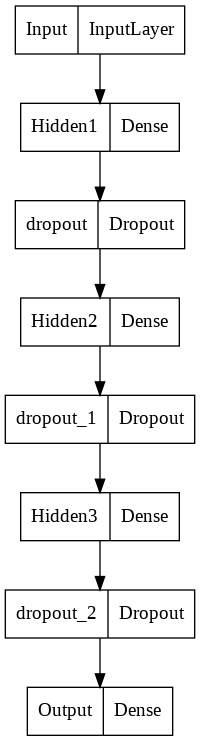

In [ ]:
dropout_model = build_dropout_model(input_shape)
dropout_model.summary()
tfk.utils.plot_model(dropout_model)

In [ ]:
history_dropout = dropout_model.fit(
    x = X_train,
    y = y_train, 
    validation_data=(X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks=[early_stopping]
).history

Epoch 1/2000
3/3 [==============================] - 1s 101ms/step - loss: 0.0924 - mse: 0.0924 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 2/2000
3/3 [==============================] - 0s 22ms/step - loss: 0.0296 - mse: 0.0296 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 3/2000
3/3 [==============================] - 0s 19ms/step - loss: 0.0250 - mse: 0.0250 - val_loss: 0.0072 - val_mse: 0.0072
Epoch 4/2000
3/3 [==============================] - 0s 19ms/step - loss: 0.0243 - mse: 0.0243 - val_loss: 0.0056 - val_mse: 0.0056
Epoch 5/2000
3/3 [==============================] - 0s 21ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 6/2000
3/3 [==============================] - 0s 18ms/step - loss: 0.0168 - mse: 0.0168 - val_loss: 0.0094 - val_mse: 0.0093
Epoch 7/2000
3/3 [==============================] - 0s 34ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 8/2000
3/3 [==============================] - 0s 20ms/step - loss: 0.0151 - 

4/4 [==============================] - 0s 11ms/step
Validation MSE 0.0013
5/5 [==============================] - 0s 5ms/step


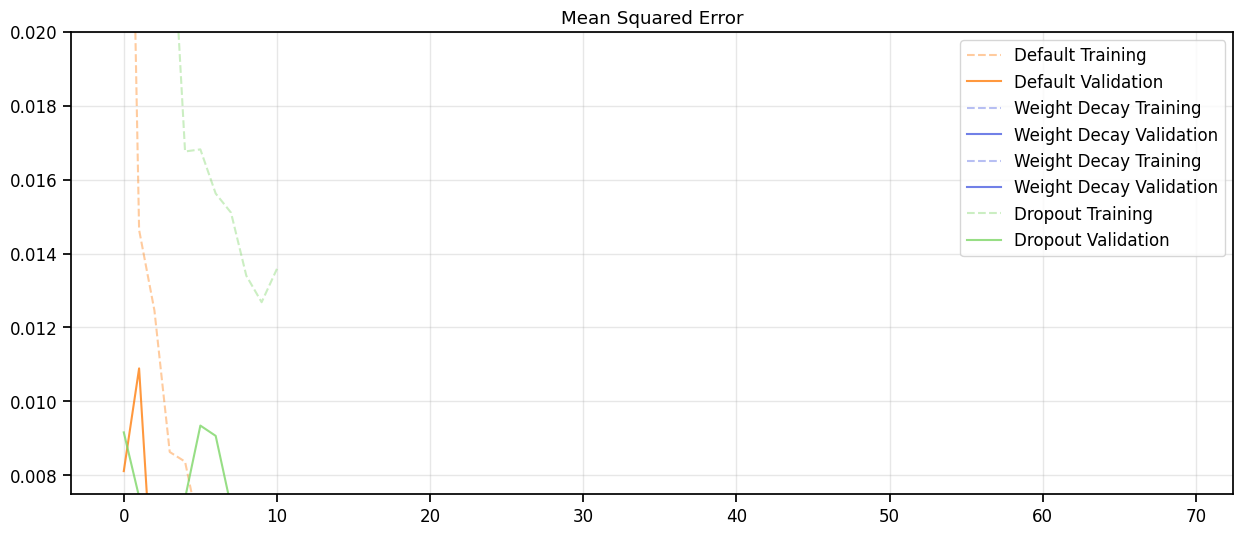

In [ ]:
# Store results
val_scores.append(mean_squared_error(y_val, dropout_model.predict(X_val)))
print('Validation MSE %.4f' % val_scores[2])
test_scores.append(mean_squared_error(y_test, dropout_model.predict(X_test)))
histories.append(history_dropout)
names.append('Dropout')
colors.append('#7DD667')
monitor(histories, names, colors, patience)

**Dropout + l2-norm**

In [ ]:
def build_dropout_l2_model(input_shape):

    # Build the neural network layer by layer
    input_layer = tfkl.Input(shape=input_shape, name='Input')
    hidden_layer1 = tfkl.Dense(units=256, activation='relu', name='Hidden1', 
                               kernel_initializer=tfk.initializers.GlorotUniform(seed=seed), 
                               kernel_regularizer=tf.keras.regularizers.l2(2e-6))(input_layer)
    hidden_layer1 = tfkl.Dropout(0.3, seed=seed)(hidden_layer1)
    hidden_layer2 = tfkl.Dense(units=128, activation='relu', name='Hidden2', 
                               kernel_initializer=tfk.initializers.GlorotUniform(seed=seed),
                               kernel_regularizer=tf.keras.regularizers.l2(2e-6))(hidden_layer1)
    hidden_layer2 = tfkl.Dropout(0.3, seed=seed)(hidden_layer2)
    hidden_layer3 = tfkl.Dense(units=64, activation='relu', name='Hidden3', 
                               kernel_initializer=tfk.initializers.GlorotUniform(seed=seed),
                               kernel_regularizer=tf.keras.regularizers.l2(2e-6))(hidden_layer2)
    hidden_layer3 = tfkl.Dropout(0.3, seed=seed)(hidden_layer3)
    output_layer = tfkl.Dense(units=1, activation='linear', name='Output', 
                              kernel_initializer=tfk.initializers.GlorotUniform(seed=seed),
                              kernel_regularizer=tf.keras.regularizers.l2(2e-6))(hidden_layer3)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_layer, name='dropout_l2_model')

    # Compile the model
    learning_rate = 1e-3
    opt = tfk.optimizers.Adam(learning_rate)
    loss = tfk.losses.MeanSquaredError()
    mtr = ['mse']
    model.compile(loss=loss, optimizer=opt, metrics=mtr)

    # Return the model
    return model

Model: "dropout_l2_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 5)]               0         
                                                                 
 Hidden1 (Dense)             (None, 256)               1536      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 Hidden2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 Hidden3 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)           

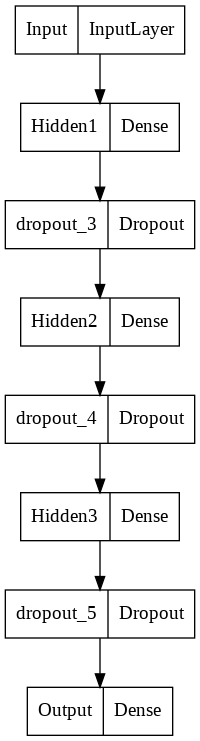

In [ ]:
dropoutl2_model = build_dropout_l2_model(input_shape)
dropoutl2_model.summary()
tfk.utils.plot_model(dropoutl2_model)

In [ ]:
history_dropoutl2 = dropoutl2_model.fit(
    x = X_train,
    y = y_train, 
    validation_data=(X_val, y_val),
    batch_size = batch_size,
    epochs = epochs,
    callbacks=[early_stopping]
).history

Epoch 1/2000
3/3 [==============================] - 2s 122ms/step - loss: 0.0428 - mse: 0.0423 - val_loss: 0.0081 - val_mse: 0.0075
Epoch 2/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0202 - mse: 0.0197 - val_loss: 0.0104 - val_mse: 0.0099
Epoch 3/2000
3/3 [==============================] - 0s 32ms/step - loss: 0.0213 - mse: 0.0207 - val_loss: 0.0058 - val_mse: 0.0053
Epoch 4/2000
3/3 [==============================] - 0s 22ms/step - loss: 0.0167 - mse: 0.0162 - val_loss: 0.0067 - val_mse: 0.0061
Epoch 5/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0154 - mse: 0.0149 - val_loss: 0.0076 - val_mse: 0.0070
Epoch 6/2000
3/3 [==============================] - 0s 24ms/step - loss: 0.0137 - mse: 0.0132 - val_loss: 0.0060 - val_mse: 0.0055
Epoch 7/2000
3/3 [==============================] - 0s 24ms/step - loss: 0.0125 - mse: 0.0120 - val_loss: 0.0041 - val_mse: 0.0036
Epoch 8/2000
3/3 [==============================] - 0s 23ms/step - loss: 0.0112 - 

4/4 [==============================] - 0s 4ms/step
Validation MSE 0.0036
5/5 [==============================] - 0s 4ms/step


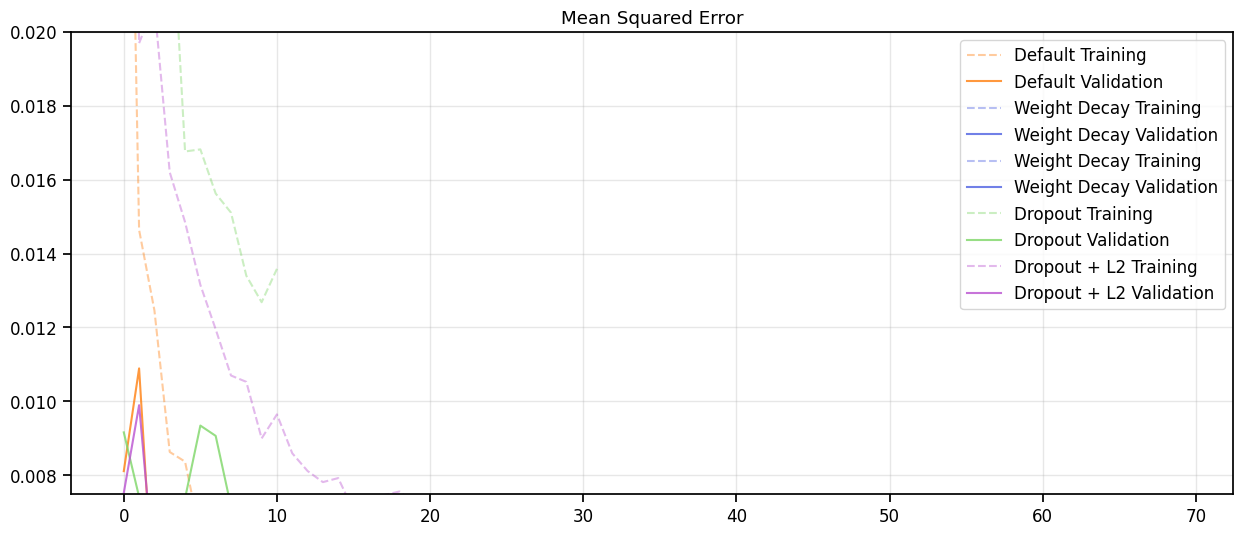

In [ ]:
# Store results
val_scores.append(mean_squared_error(y_val, dropoutl2_model.predict(X_val)))
print('Validation MSE %.4f' % val_scores[3])
test_scores.append(mean_squared_error(y_test, dropoutl2_model.predict(X_test)))
histories.append(history_dropoutl2)
names.append('Dropout + L2')
colors.append('#B951D0')
monitor(histories, names, colors, patience)

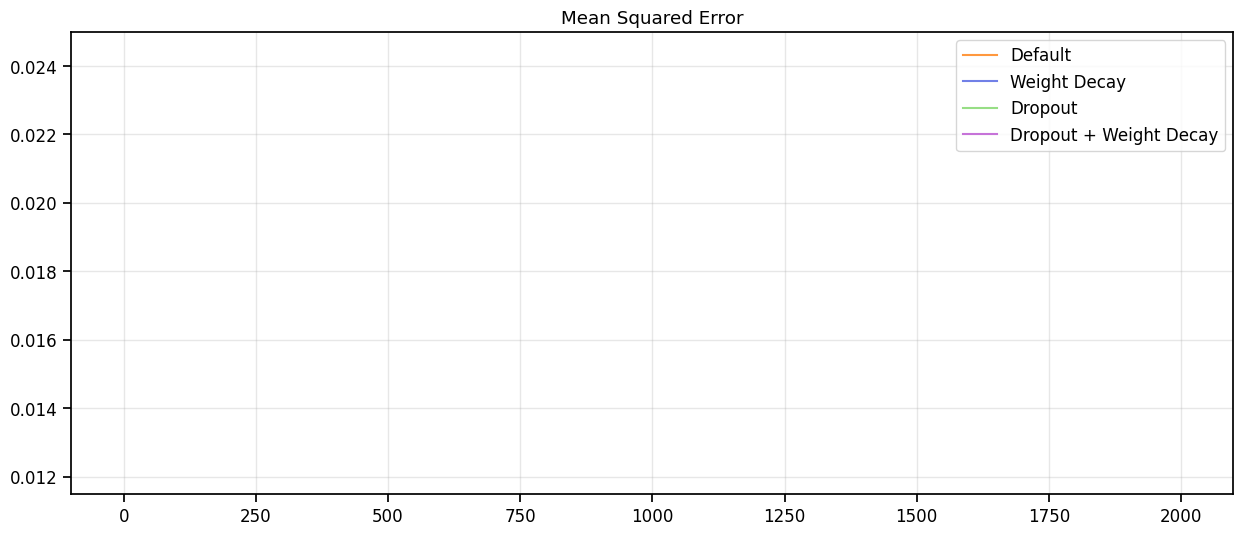

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(default_history2['val_mse'], alpha=.3, color='#ff7f0e')
plt.plot(earlystopping_history['val_mse'][:-patience], alpha=.8, color='#ff7f0e', label='Default')
plt.plot(history_l2['val_mse'], alpha=.3, color='#4D61E2')
plt.plot(history_l2['val_mse'][:-patience], alpha=.8, color='#4D61E2', label='Weight Decay')
plt.plot(history_dropout['val_mse'], alpha=.3, color='#7DD667')
plt.plot(history_dropout['val_mse'][:-patience], alpha=.8, color='#7DD667', label='Dropout')
plt.plot(history_dropoutl2['val_mse'], alpha=.3, color='#B951D0')
plt.plot(history_dropoutl2['val_mse'][:-patience], alpha=.8, color='#B951D0', label='Dropout + Weight Decay')
plt.ylim(0.0115, 0.025)
plt.title('Mean Squared Error')
plt.legend(loc='upper right')
plt.grid(alpha=.3)
plt.show()

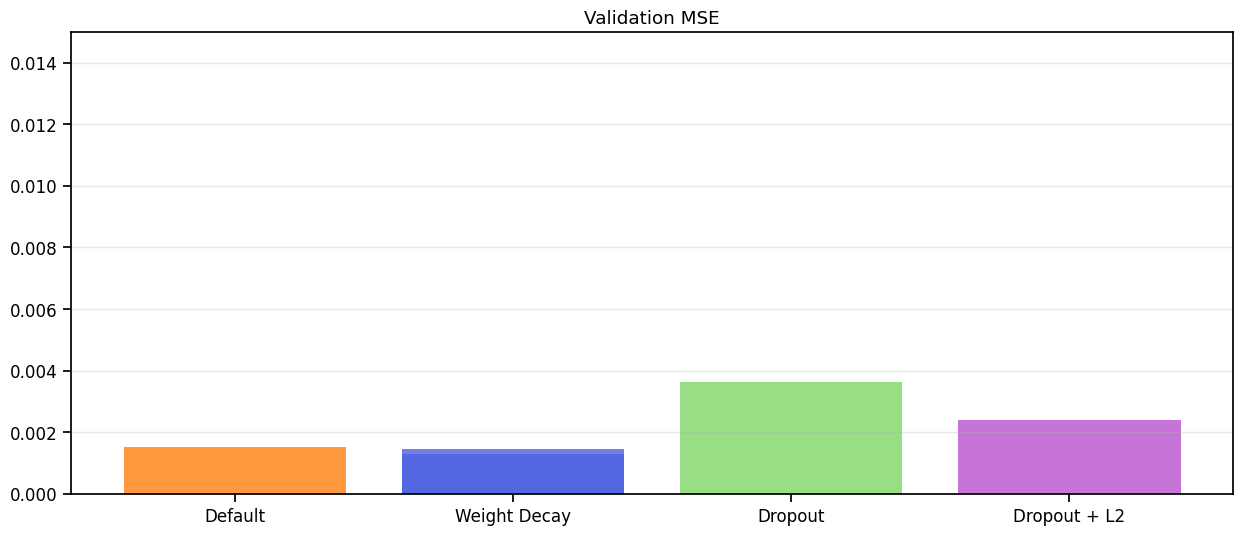

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(names, val_scores, color=colors, alpha=.8)
plt.ylim(0, .015)
plt.title('Validation MSE')
plt.grid(alpha=.3, axis='y')
plt.show()

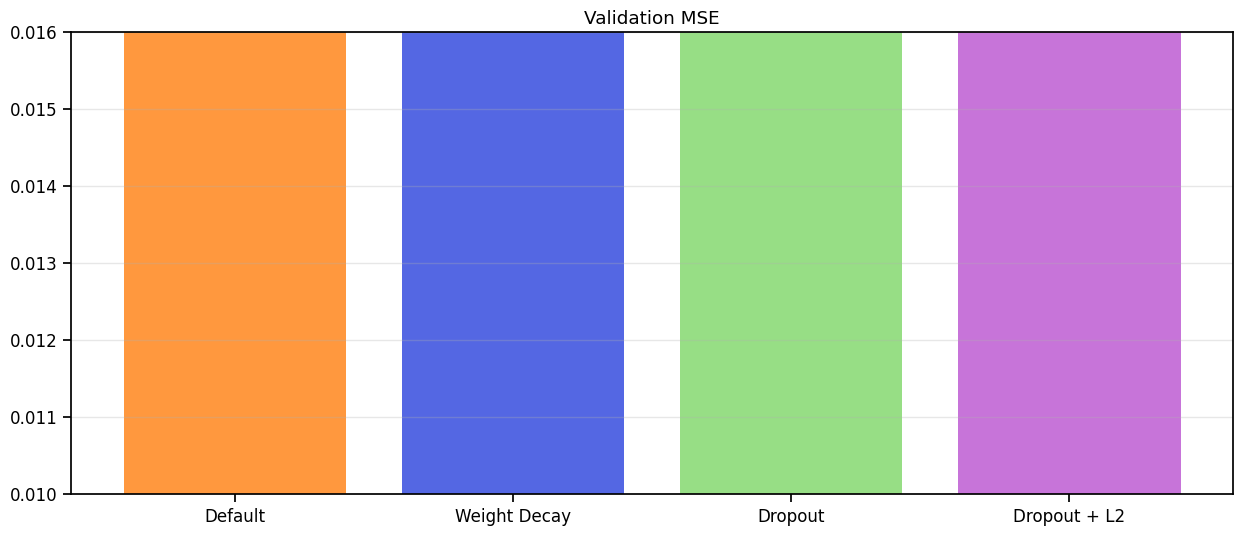

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(names, test_scores, color=colors, alpha=.8)
plt.ylim(0.01, .016)
plt.title('Validation MSE')
plt.grid(alpha=.3, axis='y')
plt.show()

Train Performance with Best Model
18/18 [==============================] - 0s 2ms/step
Mean Squared Error (MSE): 0.0080


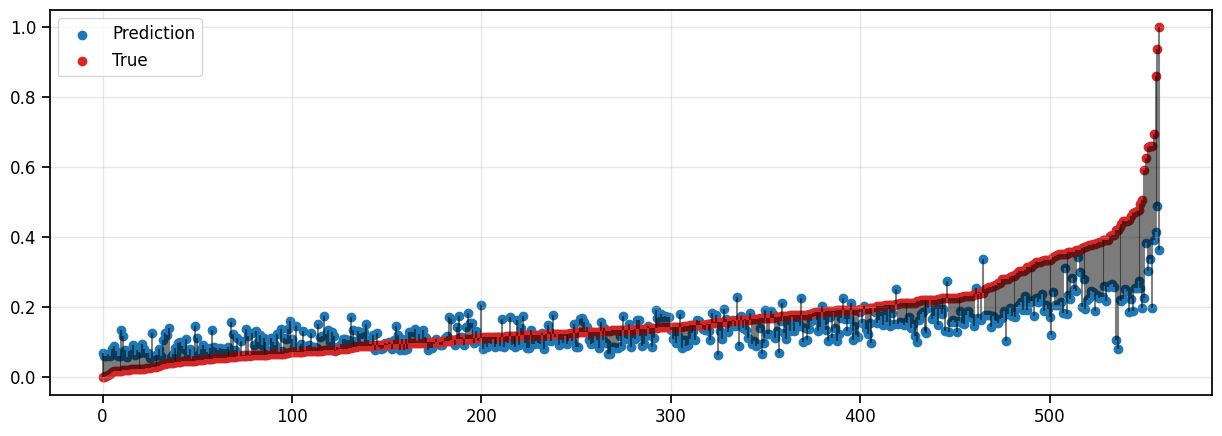

Validation Performance with Best Model
4/4 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 0.0036


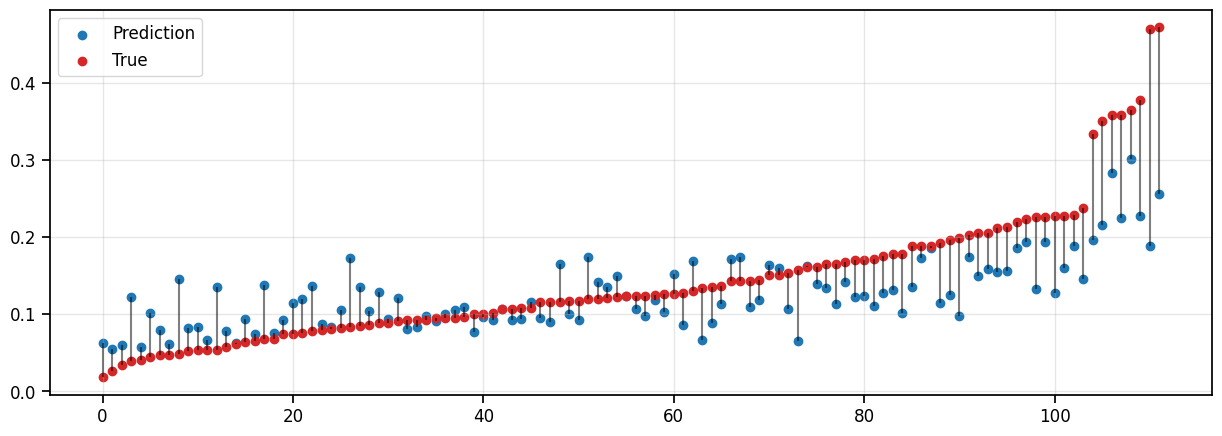

Test Performance with Best Model
5/5 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 116278916138.7549


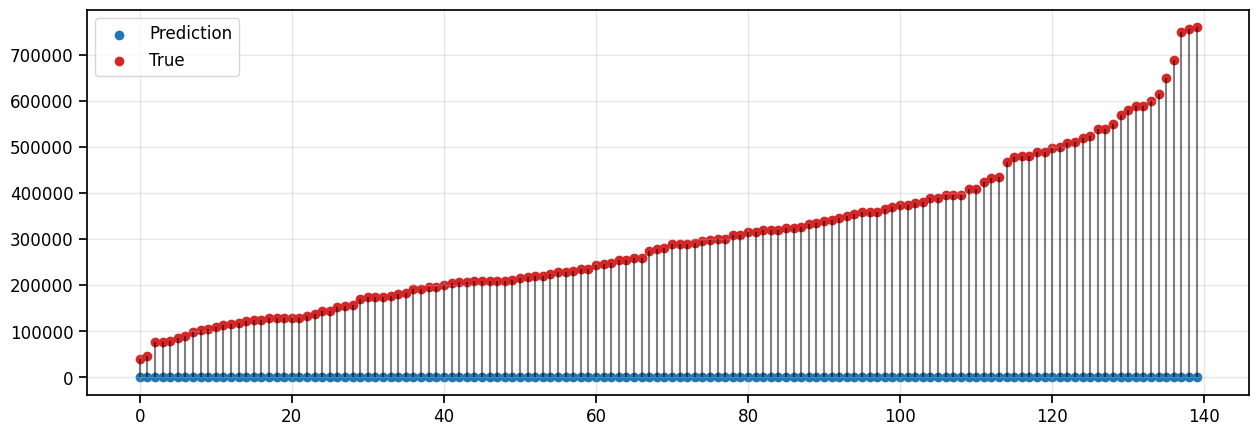

In [ ]:
print('Train Performance with Best Model')
plot_residuals(dropout_model, X_train.copy(), y_train.copy())
print('Validation Performance with Best Model')
plot_residuals(dropout_model, X_val.copy(), y_val.copy())
print('Test Performance with Best Model')
plot_residuals(dropout_model, X_test.copy(), y_test.copy())

In [ ]:
from sklearn.model_selection import KFold

num_folds = 10

histories = []
scores = []

kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

for fold_idx, (train_idx, valid_idx) in enumerate(kfold.split(X_train, y_train)):

  print("Starting training on fold num: {}".format(fold_idx+1))

  model = build_dropout_model(input_shape)

  history = model.fit(
    x = X_train.iloc[train_idx],
    y = y_train.iloc[train_idx],
    validation_data=(X_train.iloc[valid_idx], y_train.iloc[valid_idx]),
    batch_size = batch_size,
    epochs = 100,
    callbacks=[early_stopping]
  ).history

  score = model.evaluate(X_train.iloc[valid_idx], y_train.iloc[valid_idx])
  scores.append(score[1])

  histories.append(history)

Starting training on fold num: 1
Epoch 1/100
2/2 [==============================] - 1s 217ms/step - loss: 0.0339 - mse: 0.0339 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 2/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0241 - mse: 0.0241 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 3/100
2/2 [==============================] - 0s 48ms/step - loss: 0.0219 - mse: 0.0219 - val_loss: 0.0091 - val_mse: 0.0091
Epoch 4/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0178 - mse: 0.0178 - val_loss: 0.0112 - val_mse: 0.0112
Epoch 5/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0176 - mse: 0.0176 - val_loss: 0.0115 - val_mse: 0.0115
Epoch 6/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0155 - mse: 0.0155 - val_loss: 0.0104 - val_mse: 0.0103
Epoch 7/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0144 - mse: 0.0144 - val_loss: 0.0086 - val_mse: 0.0085
Epoch 8/100
2/2 [==============================] - 0s 34

MSE
Mean: 0.0071; STD: 0.0019


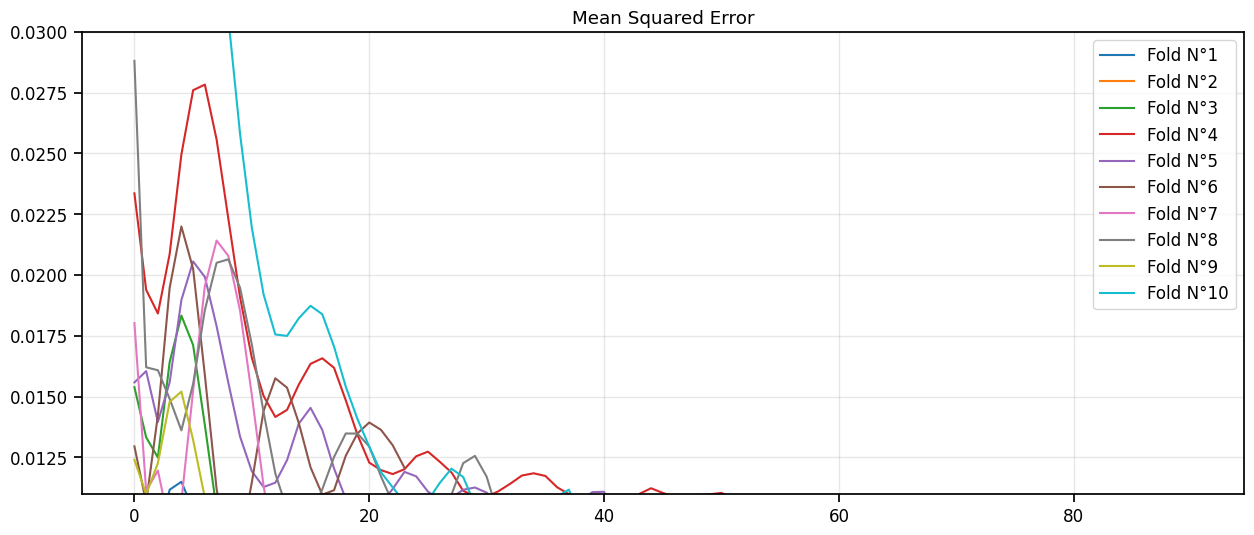

In [ ]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

print("MSE")
print("Mean: {}; STD: {}".format(np.mean(scores).round(4), np.std(scores).round(4)))

plt.figure(figsize=(15,6))
for fold_idx in range(num_folds):
  plt.plot(histories[fold_idx]['val_mse'], color=colors[fold_idx], label='Fold N°{}'.format(fold_idx+1))
  plt.ylim(0.011, 0.03)
  plt.title('Mean Squared Error')
  plt.legend(loc='upper right')
  plt.grid(alpha=.3)
plt.show()

CLASSIFICATIONS ALGORITHMS
TODO ALMOST NOTHING DONE
> Bloque con sangría



In [ ]:
X_train

,elementList__numPhotos,elementList__size,elementList__latitude,elementList__longitude,elementList__distance
220,0.161765,0.069555,0.178764,0.366399,0.509980
459,0.389706,0.246294,0.717702,0.044460,0.884024
129,0.683824,0.255416,0.855619,0.600531,0.709270
293,0.257353,0.070696,0.291016,0.986284,0.993531
444,0.176471,0.109464,0.452346,0.344937,0.094596
...,...,...,...,...,...
318,0.176471,0.150513,0.251198,0.735403,0.567574
144,0.088235,0.257697,0.260952,0.768328,0.609073
475,0.169118,0.110604,0.578668,0.150253,0.547219
319,0.080882,0.015964,0.460035,0.364339,0.050809


In [ ]:
y_train

,elementList__price
220,0.133586
459,0.384881
129,0.195720
293,0.019676
444,0.153607
...,...
318,0.023127
144,0.420090
475,0.177080
319,0.074215


In [ ]:
print(X_train.dtypes)

elementList__numPhotos    float64
elementList__size         float64
elementList__latitude     float64
elementList__longitude    float64
elementList__distance     float64
dtype: object


In [ ]:
f = numersNoPrice.astype({'elementList__numPhotos':'int','elementList__size':'int','elementList__latitude':'int','elementList__longitude':'int','elementList__distance':'int'})

In [ ]:
f

,elementList__numPhotos,elementList__size,elementList__latitude,elementList__longitude,elementList__distance
0,17,76,40,-3,3183
1,46,109,40,-3,3989
2,33,90,40,-3,9177
3,98,556,40,-3,13764
4,70,280,40,-3,14434
...,...,...,...,...,...
695,34,281,40,-3,11086
696,33,86,40,-3,12328
697,38,350,40,-3,14098
698,32,115,40,-3,8846


In [ ]:
t=target.astype({'elementList__price':'int'})
t

,elementList__price
0,108000
1,279000
2,180000
3,485000
4,370000
...,...
695,315000
696,155000
697,272000
698,186000


In [ ]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(f, t)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy of the Logistic Regression is 0.04285714285714286


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
